In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from kNN import kNN

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier


In [2]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

PART1

In [3]:
# Q(1)
df = pd.read_csv('virus_data.csv')
print("Number of Rows : " + str(df.shape[0]))
print("Number of Cols : " + str(df.shape[1]))

Number of Rows : 1250
Number of Cols : 26


In [4]:
# Q(2)
print(df['num_of_siblings'].value_counts())

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64


In [5]:
# Q(3)
print(df.drop(['spread', 'risk'], axis=1).columns)

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'symptoms',
       'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06',
       'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10'],
      dtype='object')


In [6]:
# Q(4)
X = df.drop(['spread', 'risk'], axis=1)
y = df[['spread', 'risk']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=72)


PART2<br>


In [7]:
# Q(5)
corr_df = pd.concat([y_train[['spread']], X_train[['PCR_01', 'PCR_02', 'PCR_09']]], axis=1, join="inner")
print(corr_df.corr())

          spread    PCR_01    PCR_02    PCR_09
spread  1.000000  0.072425  0.516057 -0.060040
PCR_01  0.072425  1.000000 -0.001157  0.004436
PCR_02  0.516057 -0.001157  1.000000 -0.069589
PCR_09 -0.060040  0.004436 -0.069589  1.000000


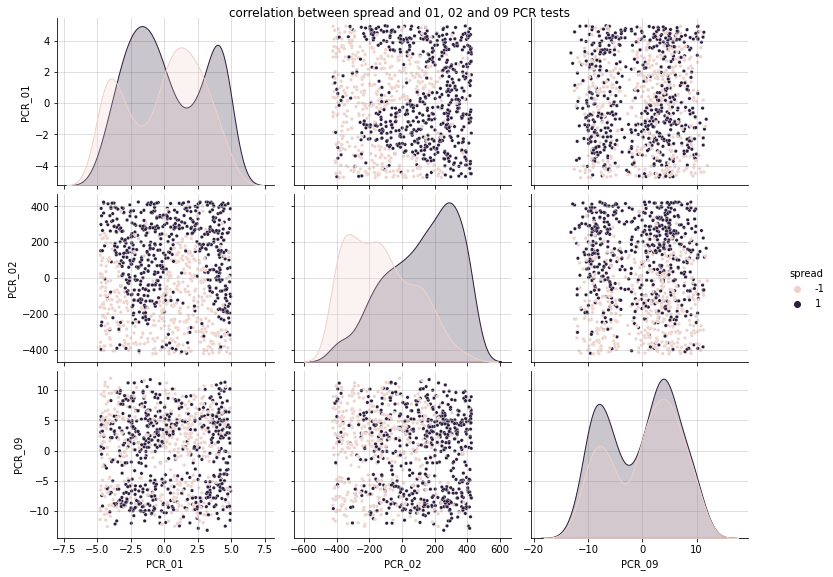

In [8]:
# Q(6)
g = sns.pairplot(corr_df, hue='spread', plot_kws={"s": 12})  # pairplot of the features: PCR_01, PCR_02 and PCR_09 on
# spread target feature
g.fig.suptitle("correlation between spread and 01, 02 and 09 PCR tests", y=1)
for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
g.fig.set_size_inches(12, 8)

In [9]:
model = kNN(n_neighbors=1)

1.0


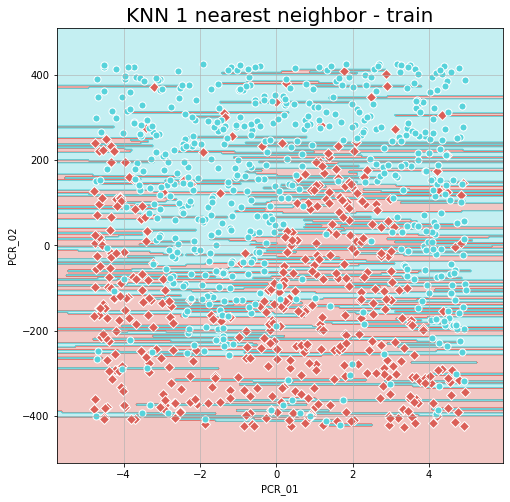

In [10]:
model.fit(X_train[['PCR_01', 'PCR_02']], y_train[['spread']]) 

# Q(7)
print(model.score(X_train[['PCR_01', 'PCR_02']], y_train[['spread']]))  # train_accuarcy and visualization
visualize_clf(model, np.array(X_train[['PCR_01', 'PCR_02']]), np.array(y_train['spread']),
                            "KNN 1 nearest neighbor - train",
                            "PCR_01", "PCR_02")

0.736


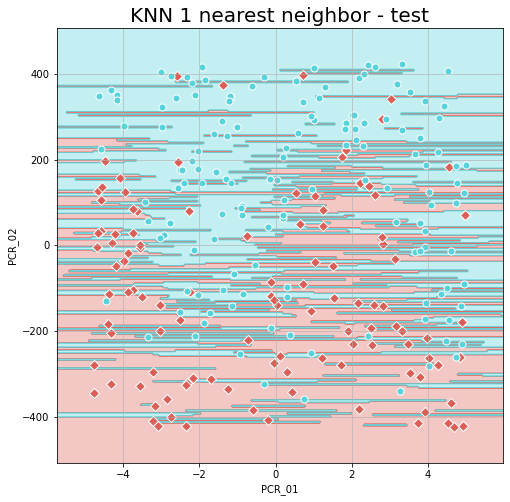

In [11]:
print(model.score(X_test[['PCR_01', 'PCR_02']], y_test[['spread']]))  # test_accuarcy and visualization
visualize_clf(model, np.array(X_test[['PCR_01', 'PCR_02']]), np.array(y_test['spread']),
                            "KNN 1 nearest neighbor - test",
                            "PCR_01", "PCR_02")

In [12]:
# Q(8)
model_normalized = kNN(n_neighbors=1)  # normalized model
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train[['PCR_01', 'PCR_02']])
X_test_normalized = min_max_scaler.fit_transform(X_test[['PCR_01', 'PCR_02']])
model_normalized.fit(X_train_normalized, y_train[['spread']])


1.0


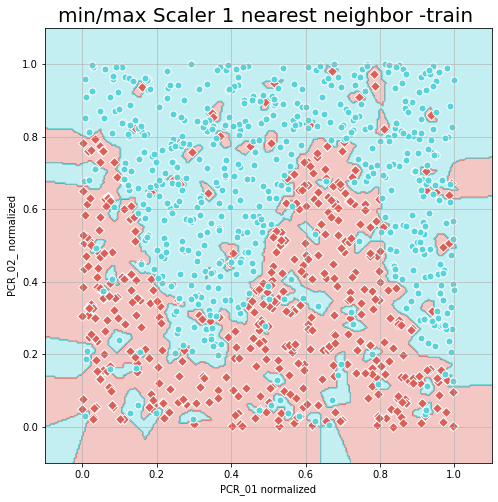

In [13]:

print(model_normalized.score(X_train_normalized, y_train[['spread']]))  # train accuarcy and visualization
visualize_clf(model_normalized, np.array(X_train_normalized), np.array(y_train['spread']),
                            "min/max Scaler 1 nearest neighbor -train ", "PCR_01 normalized", "PCR_02_ normalized")


0.804


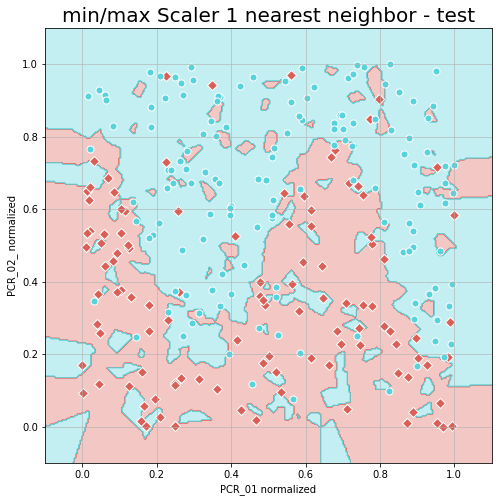

In [14]:
print(model_normalized.score(X_test_normalized, y_test[['spread']]))  # train accuarcy and visualization
visualize_clf(model_normalized, np.array(X_test_normalized), np.array(y_test['spread']),
                            "min/max Scaler 1 nearest neighbor - test", "PCR_01 normalized", "PCR_02_ normalized")


0.889


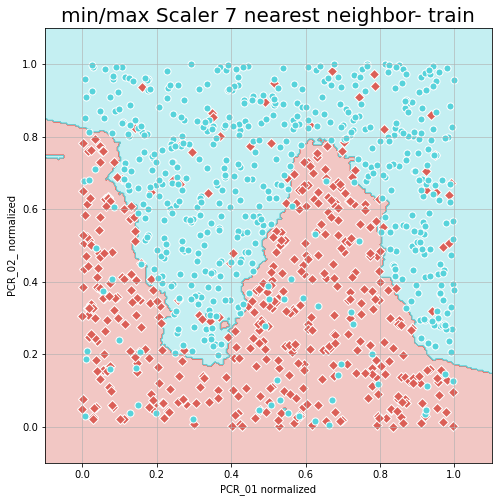

In [15]:
# Q(9)
model_normalized_7 = kNN(n_neighbors=7)  # created k=7 normalized model
model_normalized_7.fit(X_train_normalized, y_train[['spread']])
print(model_normalized_7.score(X_train_normalized, y_train[['spread']]))  # train accuarcy and visualization
visualize_clf(model_normalized_7, np.array(X_train_normalized), np.array(y_train['spread']),
                            "min/max Scaler 7 nearest neighbor- train", "PCR_01 normalized", "PCR_02_ normalized")


0.856


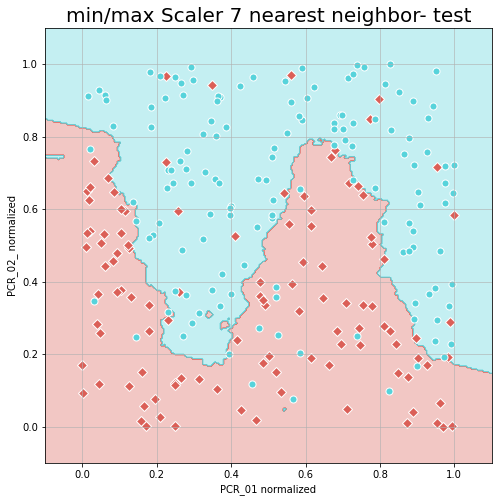

In [16]:
print(model_normalized_7.score(X_test_normalized, y_test[['spread']]))  # train accuarcy and visualization
visualize_clf(model_normalized_7, np.array(X_test_normalized), np.array(y_test['spread']),
                            "min/max Scaler 7 nearest neighbor- test", "PCR_01 normalized", "PCR_02_ normalized")

Part3

In [17]:
# Q(11)
ohe = OneHotEncoder()
categories = ohe.fit_transform(df[['blood_type']]).toarray()

In [18]:
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
blood_type_df = pd.DataFrame(categories, columns=feature_labels)
print(blood_type_df)

       A+   A-  AB+  AB-   B+   B-   O+   O-
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
4     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...
1245  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1246  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1247  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1248  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1249  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[1250 rows x 8 columns]


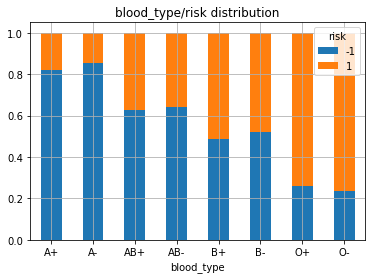

In [19]:
# Q(12)
_ = pd.crosstab(df["blood_type"], columns=df['risk'], normalize="index").plot(kind="bar", stacked=True, rot=0,
                                                                              title='blood_type/risk distribution')
plt.grid()

In [20]:
# Q(13)
# creating 3 feature we found helpful thanks to their correlation to the target variable
df['blood_type_A'] = pd.Series(df["blood_type"].isin(["A+", "A-", "AB+", "AB-"])).astype(float)
df['blood_type_B'] = pd.Series(df["blood_type"].isin(["B+", "B-"])).astype(float)
df['blood_type_O'] = pd.Series(df["blood_type"].isin(["O+", "O-"])).astype(float)
df.drop(['blood_type'], axis=1, inplace=True)

In [21]:
# extracting from the symptoms feature more features we found helpful-isolate each symptom to binary feature and
# dropped the symptoms itself
df['low_appetite'] = df['symptoms'].str.contains('low_appetite').fillna(value=False).apply(lambda x: int(x))
df['cough'] = df['symptoms'].str.contains('cough').fillna(value=False).apply(lambda x: int(x))
df['shortness_of_breath'] = df['symptoms'].str.contains('shortness_of_breath').fillna(value=False).apply(
    lambda x: int(x))
df['fever'] = df['symptoms'].str.contains('fever').fillna(value=False).apply(lambda x: int(x))
df['sore_throat'] = df['symptoms'].str.contains('sore_throat').fillna(value=False).apply(lambda x: int(x))
df.drop('symptoms', axis=1, inplace=True)

In [22]:
# creating x and y location features from location feature and drop the location.
df["current_location_x"] = df["current_location"].apply(lambda x: (x.split(","))[0][2:-1]).astype(float)
df["current_location_y"] = df["current_location"].apply(lambda x: (x.split(","))[1][2:-2]).astype(float)
df.drop(['current_location'], axis=1, inplace=True)

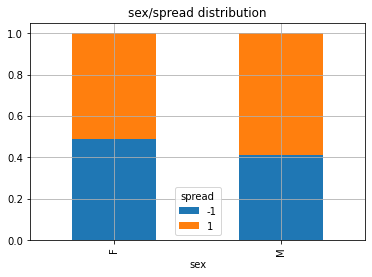

In [23]:
# showing sex correlation using crosstab and removed this feature from our df.
_ = pd.crosstab(X_train['sex'], y_train['spread'], normalize="index").plot(kind='bar', stacked=True, title='sex'
                                                                                                           '/spread '
                                                                                                           'distribution')
plt.grid()

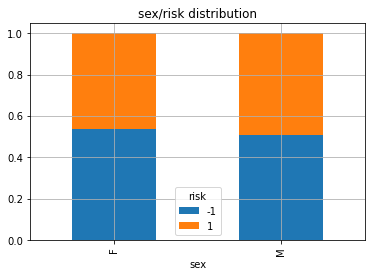

In [24]:
_ = pd.crosstab(X_train['sex'], y_train['risk'], normalize="index").plot(kind='bar', stacked=True, title='sex/risk '
                                                                                                         'distribution')
plt.grid()

In [25]:
# dropped patient_id and pcr_date - we found it no informative
df.drop(['patient_id'], axis=1, inplace=True)
df.drop(['pcr_date'], axis=1, inplace=True)
df.drop(['sex'], axis=1, inplace=True)

In [26]:
df

age  weight  num_of_siblings  happiness_score  household_income  \
0       7    24.7                2                8             312.3   
1      21    86.3                4                6             641.5   
2      28    98.9                1                9             864.2   
3      20    55.9                3                8             428.3   
4      44    47.2                3                7             371.1   
...   ...     ...              ...              ...               ...   
1245   32    54.0                1                9             398.6   
1246   36    73.4                2                7             563.1   
1247   13    45.2                1                9             725.4   
1248   35    98.2                2                8             935.8   
1249    6    15.7                0                7            1504.6   

      conversations_per_day  sugar_levels  sport_activity    PCR_01  \
0                         3            79               1  2.748841   
1                         1            84               2  4.277620   
2                         9           113               0 -4.607029   
3                         3            95               3  0.850419   
4                         1            43               3  4.633929   
...                     ...           ...             ...       ...   
1245                      4            81               1 -2.198904   
1246                      2            75               0 -3.868484   
1247                     13           102               1 -1.233535   
1248                      3           110               3  0.319801   
1249                      1            50               1 -1.715353   

          PCR_02  ...  blood_type_A  blood_type_B  blood_type_O  low_appetite  \
0     -16.927412  ...           1.0           0.0           0.0             1   
1     152.652848  ...           0.0           0.0           1.0             1   
2     152.417556  ...           0.0           0.0           1.0             0   
3    -401.639633  ...           0.0           0.0           1.0             0   
4     153.841878  ...           0.0           0.0           1.0             0   
...          ...  ...           ...           ...           ...           ...   
1245  196.149851  ...           0.0           0.0           1.0             1   
1246  161.349777  ...           1.0           0.0           0.0             0   
1247  335.635622  ...           1.0           0.0           0.0             1   
1248 -315.143295  ...           0.0           0.0           1.0             0   
1249 -164.097342  ...           1.0           0.0           0.0             1   

      cough  shortness_of_breath  fever  sore_throat  current_location_x  \
0         0                    0      0            1            32.44874   
1         0                    0      0            0            38.07789   
2         0                    0      0            0            38.07789   
3         0                    0      0            0            51.40148   
4         0                    0      0            1            44.27804   
...     ...                  ...    ...          ...                 ...   
1245      0                    0      0            0            52.48173   
1246      0                    0      0            0            10.31672   
1247      0                    1      0            0            25.92493   
1248      0                    0      0            1             6.15038   
1249      0                    0      0            1            43.78956   

      current_location_y  
0              -99.73314  
1               13.44275  
2               13.44275  
3               -1.32471  
4              -88.27205  
...                  ...  
1245            -2.12139  
1246           123.89071  
1247            73.66633  
1248             6.83042  
1249             7.60872  

[1250 rows x 30 columns]

In [27]:
df.columns

Index(['age', 'weight', 'num_of_siblings', 'happiness_score',
       'household_income', 'conversations_per_day', 'sugar_levels',
       'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05',
       'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk',
       'blood_type_A', 'blood_type_B', 'blood_type_O', 'low_appetite', 'cough',
       'shortness_of_breath', 'fever', 'sore_throat', 'current_location_x',
       'current_location_y'],
      dtype='object')

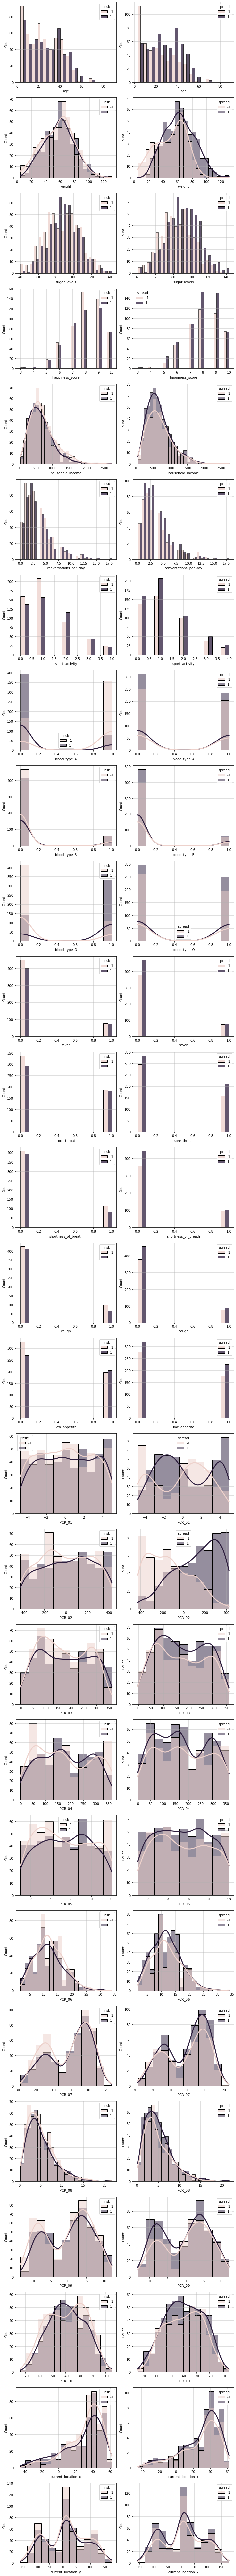

In [28]:
training_df, test_df = train_test_split(df, train_size=0.8, random_state=72)
COL_NAME = ['age', 'weight', 'sugar_levels', 'happiness_score', 'household_income', 'conversations_per_day',
            'sport_activity', 'blood_type_A', 'blood_type_B', 'blood_type_O', 'fever', 'sore_throat',
            'shortness_of_breath', 'cough', 'low_appetite',
            'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'current_location_x', 'current_location_y']

COLS, ROWS = (2, len(COL_NAME))  # visualized the correlation of the features using histplot to each feature on the
# target variables. IN JUPYTER! not enough space on 'traditional' IDE.
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
    column = COL_NAME[row]
    for j, cls in enumerate(["risk", "spread"]):
        plt.subplot(ROWS, COLS, row * COLS + 1 + j)
        isContinuous = "float" in training_df[column].dtype.name
        sns.histplot(data=training_df, x=column, hue=cls, line_kws={"linewidth": 3},
                     kde=isContinuous, multiple="layer" if isContinuous else "dodge")
        plt.grid(alpha=0.5)
plt.tight_layout()

In [29]:
# Q(14) spread correlations
s = training_df.corr().spread.abs()
s.sort_values(kind="quicksort", ascending=False)

spread                   1.000000
PCR_02                   0.516057
weight                   0.279894
age                      0.183582
sugar_levels             0.157638
PCR_01                   0.072425
risk                     0.070989
PCR_09                   0.060040
num_of_siblings          0.049712
current_location_y       0.044917
sore_throat              0.039651
PCR_07                   0.038017
PCR_03                   0.034038
household_income         0.033930
fever                    0.033522
blood_type_O             0.028797
shortness_of_breath      0.028088
PCR_06                   0.027280
low_appetite             0.024413
blood_type_A             0.020841
current_location_x       0.018491
PCR_04                   0.016950
blood_type_B             0.012245
PCR_10                   0.008097
happiness_score          0.006635
cough                    0.005898
PCR_08                   0.004472
PCR_05                   0.004130
conversations_per_day    0.002482
sport_activity

In [30]:
# Q(15) + Q(16) risk correlations
s = training_df.corr().risk.abs()
s.sort_values(kind="quicksort", ascending=False)

risk                     1.000000
blood_type_A             0.512794
blood_type_O             0.494135
current_location_x       0.074989
cough                    0.072158
spread                   0.070989
household_income         0.066713
PCR_06                   0.064695
shortness_of_breath      0.063313
low_appetite             0.059503
weight                   0.052293
PCR_09                   0.049562
PCR_02                   0.048680
PCR_01                   0.047758
age                      0.047275
PCR_03                   0.045655
sport_activity           0.041775
sore_throat              0.032059
PCR_07                   0.030640
blood_type_B             0.027676
num_of_siblings          0.025369
sugar_levels             0.019295
fever                    0.015618
PCR_05                   0.012693
happiness_score          0.010363
PCR_08                   0.008486
PCR_04                   0.007334
PCR_10                   0.006720
current_location_y       0.003338
conversations_

Text(0.5, 1, 'PCRs distributions on risk')

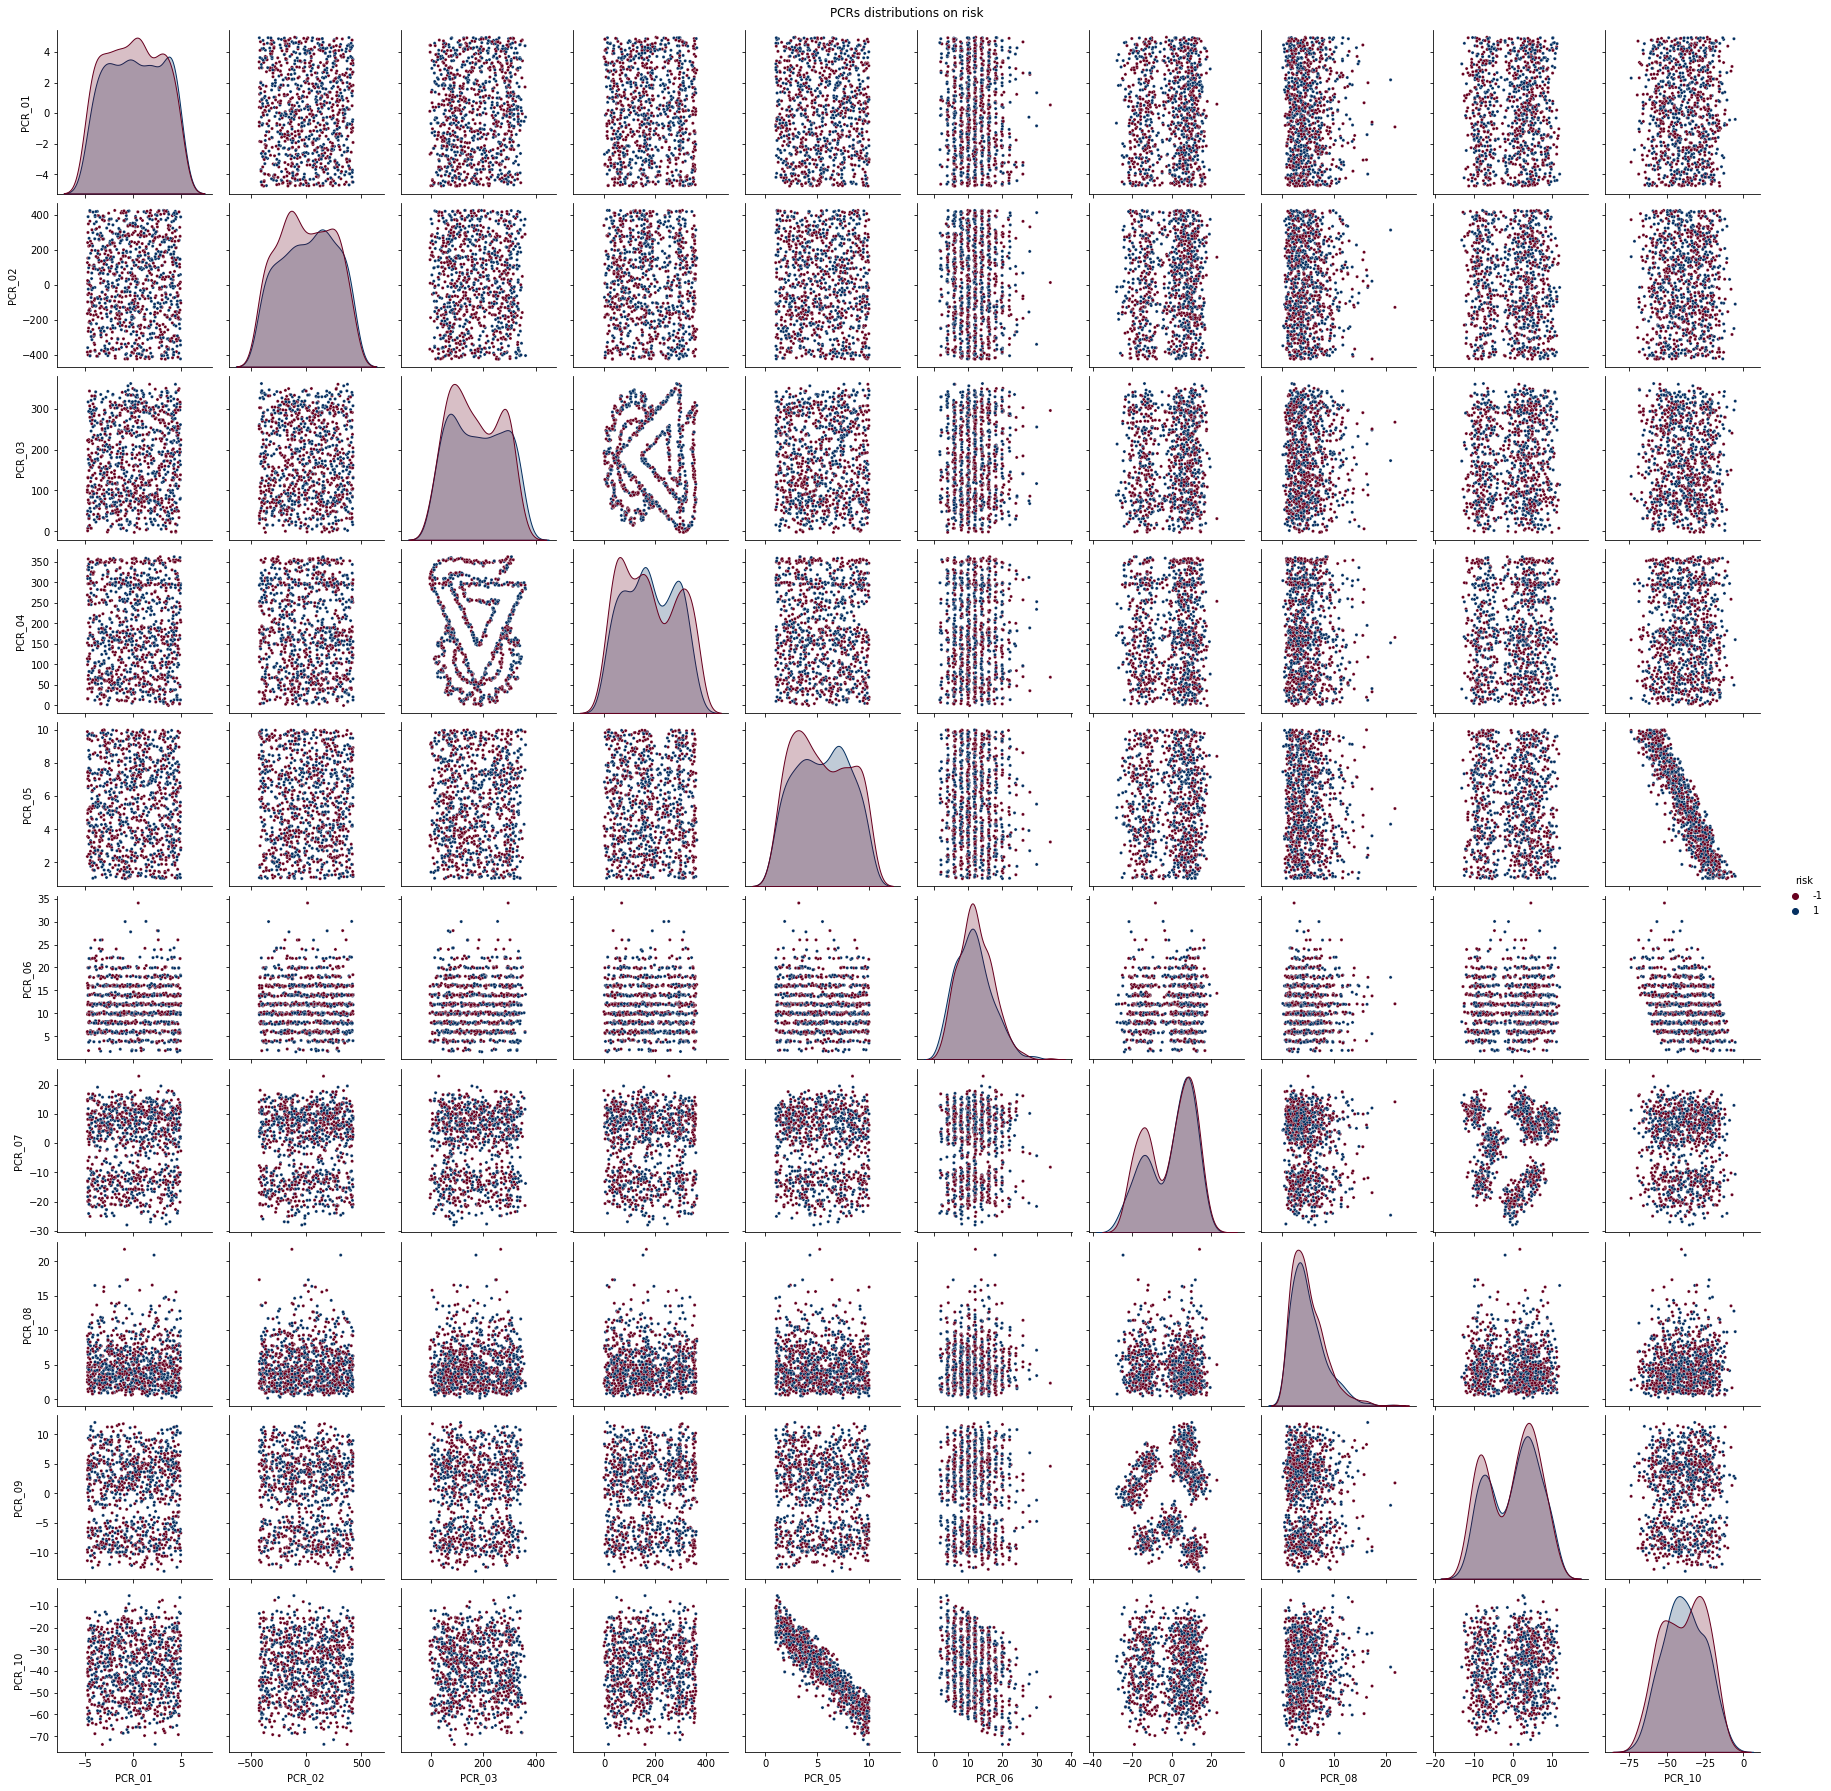

In [31]:
# Q(17) - PCR features and risk pairplot
pp = sns.pairplot(training_df[training_df.filter(like='PCR').columns.tolist() + ["risk"]], plot_kws={"s": 10},
                  hue="risk",
                  palette='RdBu')
pp.fig.suptitle("PCRs distributions on risk", y=1)

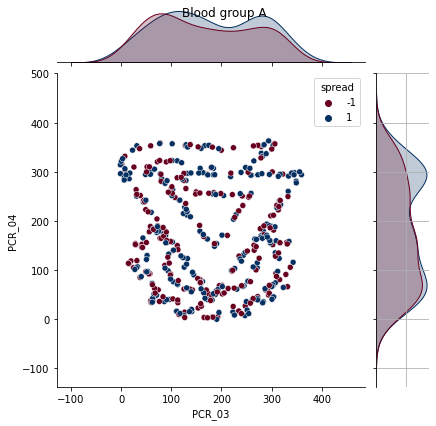

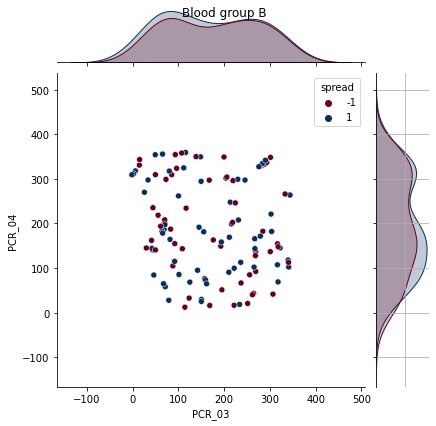

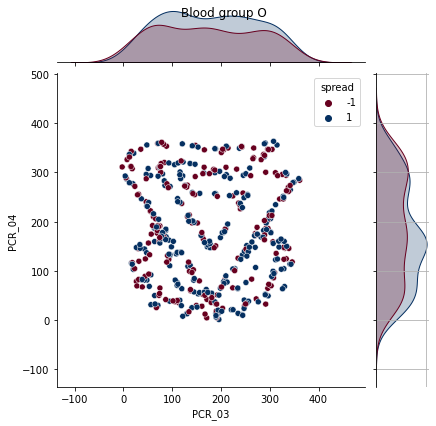

In [32]:
# Q(18) + Q(19)
G_A1 = sns.jointplot(data=training_df[training_df['blood_type_A'] == 1], x="PCR_03", y="PCR_04", hue="spread",
                     palette="RdBu")
G_A1.fig.suptitle("Blood group A")
plt.grid()
plt.show()

G_B1 = sns.jointplot(data=training_df[training_df['blood_type_B'] == 1], x="PCR_03", y="PCR_04", hue="spread",
                     palette="RdBu")
G_B1.fig.suptitle("Blood group B")
plt.grid()
plt.show()

G_O1 = sns.jointplot(data=training_df[training_df['blood_type_O'] == 1], x="PCR_03", y="PCR_04", hue="spread",
                     palette="RdBu")
G_O1.fig.suptitle("Blood group O")
plt.grid()
plt.show()

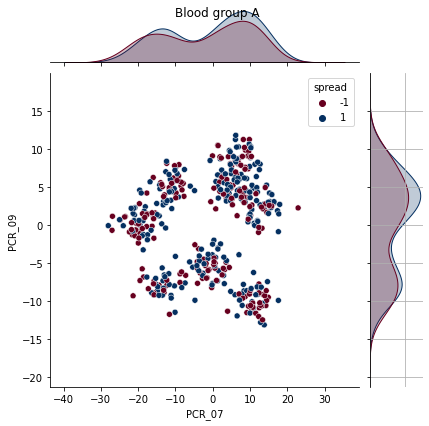

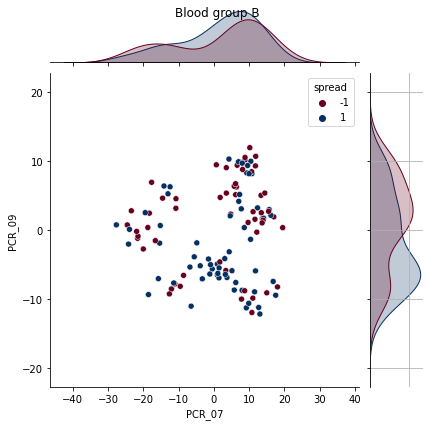

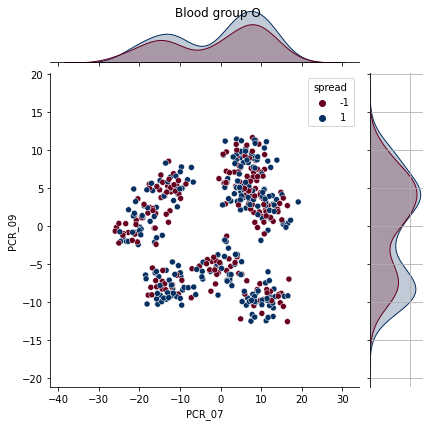

In [33]:
G_A2 = sns.jointplot(data=training_df[training_df['blood_type_A'] == 1], x="PCR_07", y="PCR_09", hue="spread",
                     palette="RdBu")
G_A2.fig.suptitle("Blood group A")
plt.grid()
plt.show()

G_B2 = sns.jointplot(data=training_df[training_df['blood_type_B'] == 1], x="PCR_07", y="PCR_09", hue="spread",
                     palette="RdBu")
G_B2.fig.suptitle("Blood group B")
plt.grid()
plt.show()

G_O2 = sns.jointplot(data=training_df[training_df['blood_type_O'] == 1], x="PCR_07", y="PCR_09", hue="spread",
                     palette="RdBu")
G_O2.fig.suptitle("Blood group O")
plt.grid()
plt.show()

PART 4


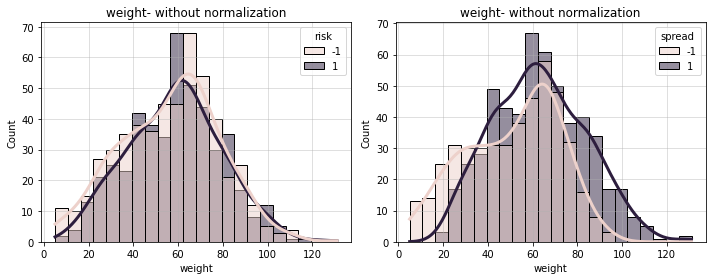

In [34]:
# PART 4
# Q(21) without normalization
COL_NAME = ['weight']
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
    column = COL_NAME[row]
    for j, cls in enumerate(["risk", "spread"]):
        plt.subplot(ROWS, COLS, row * COLS + 1 + j)
        isContinuous = "float" in training_df[column].dtype.name
        sns.histplot(data=training_df, x=column, hue=cls, line_kws={"linewidth": 3},
                     kde=isContinuous, multiple="layer" if isContinuous else "dodge")
        plt.title('weight- without normalization')
        plt.grid(alpha=0.5)
plt.tight_layout()


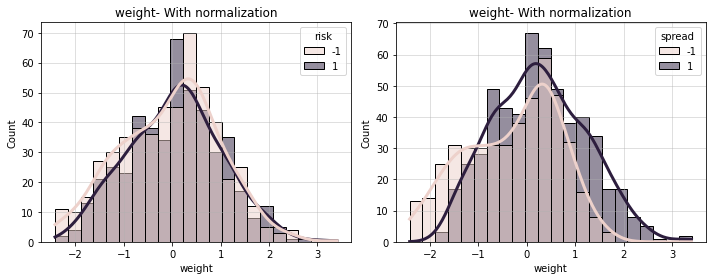

In [35]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
std_scaler = StandardScaler()
min_max_features = ['age', 'PCR_03', 'PCR_04', 'PCR_05', 'happiness_score', 'conversations_per_day',
                    'sport_activity', 'PCR_01', 'PCR_02', 'PCR_07', 'PCR_09', 'current_location_y', 'num_of_siblings']
std_features = ['weight', 'sugar_levels', 'household_income', 'PCR_06', 'PCR_08', 'PCR_10', 'current_location_x']

# normalization for each feature
for feature in min_max_features:
    temp_df = training_df[[feature]]
    min_max_scaler.fit(temp_df)
    normalaized = min_max_scaler.transform(temp_df)
    training_df[feature] = normalaized
for feature in std_features:
    temp_df = training_df[[feature]]
    std_scaler.fit(temp_df)
    normalaized = std_scaler.transform(temp_df)
    training_df[feature] = normalaized

COL_NAME = ['weight']  # visualization of the feature weight- normalized 
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
    column = COL_NAME[row]
    for j, cls in enumerate(["risk", "spread"]):
        plt.subplot(ROWS, COLS, row * COLS + 1 + j)
        isContinuous = "float" in training_df[column].dtype.name
        sns.histplot(data=training_df, x=column, hue=cls, line_kws={"linewidth": 3},
                     kde=isContinuous, multiple="layer" if isContinuous else "dodge")
        plt.grid(alpha=0.5)
        plt.title('weight- With normalization')
plt.tight_layout()

PART 5

In [49]:
# Q(21)
X_train_norm = training_df.drop(['spread', 'risk'], axis=1)
y_train_norm = training_df[['spread', 'risk']]

knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='forward')
sfs.fit_transform(X_train_norm, y_train_norm['spread'])
print(sfs.get_support())
print(sfs.get_feature_names_out())

[False  True False False False False False False  True  True False False
 False False False False False False False False False False False False
 False False False False]
['weight' 'PCR_01' 'PCR_02']


In [50]:
training_df.columns

Index(['age', 'weight', 'num_of_siblings', 'happiness_score',
       'household_income', 'conversations_per_day', 'sugar_levels',
       'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05',
       'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk',
       'blood_type_A', 'blood_type_B', 'blood_type_O', 'low_appetite', 'cough',
       'shortness_of_breath', 'fever', 'sore_throat', 'current_location_x',
       'current_location_y'],
      dtype='object')